https://www.geeksforgeeks.org/data-analysis/time-series-data-visualization-in-python/

In [1]:
import pandas as pd

start_date = "2023-01-10"
end_date = "2023-08-12"
month_list = pd.date_range(start=start_date, end=end_date, freq='MS').strftime("%Y-%m-%d").tolist()
print(month_list)   

['2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01']


In [3]:
# conda install statsmodels

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [5]:
df = pd.read_csv("stock_data.csv", 
                 parse_dates=True, 
                 index_col="Date")
df.head()

,Unnamed: 0,Open,High,Low,Close,Volume,Name
Date,,,,,,,
2006-01-03,NaN,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,NaN,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,NaN,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,NaN,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,NaN,43.10,43.66,42.82,43.42,16268338,AABA


In [6]:
df.drop(columns='Unnamed: 0', inplace =True)
df.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA


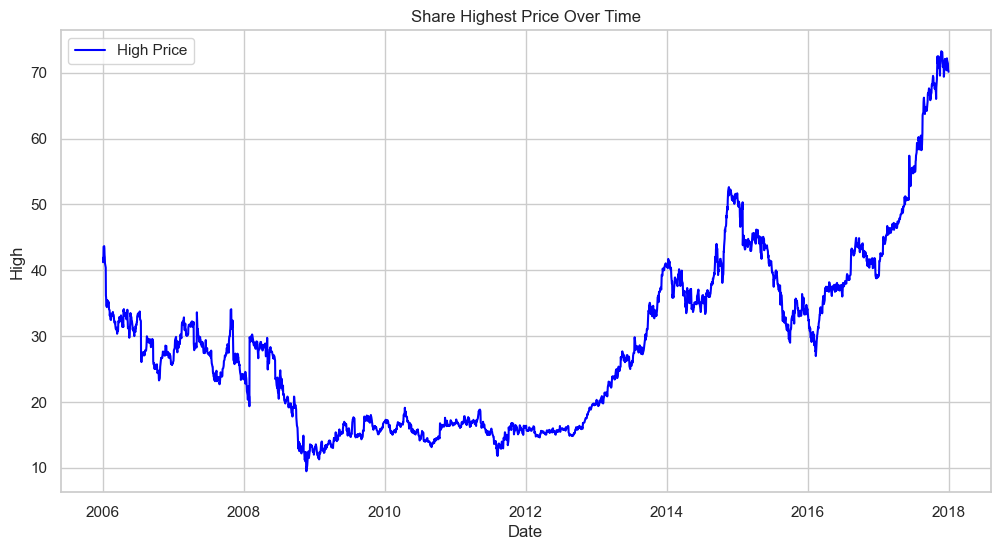

In [7]:
sns.set(style="whitegrid") 

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='High', label='High Price', color='blue')

plt.xlabel('Date')
plt.ylabel('High')
plt.title('Share Highest Price Over Time')

plt.show()

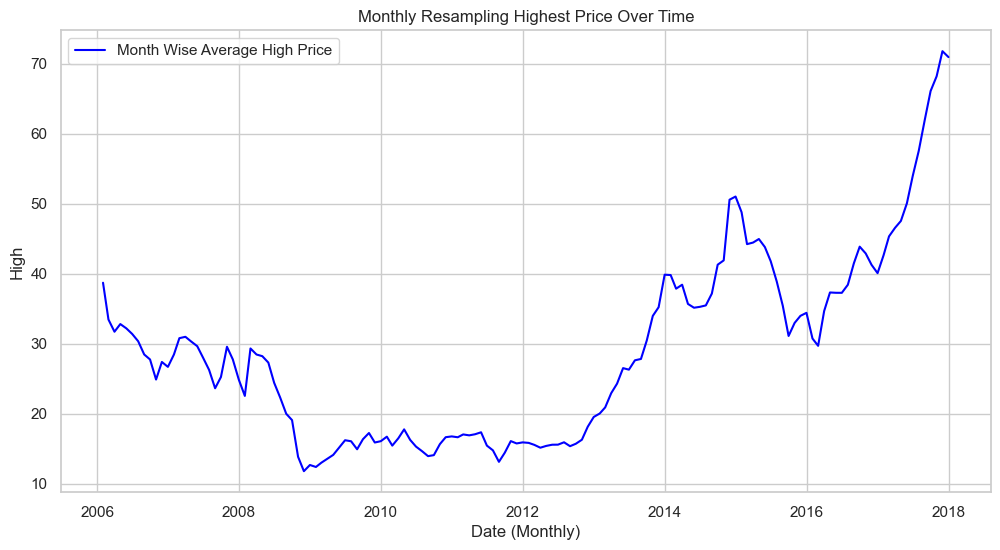

In [8]:
df_resampled = df.resample('ME').mean(numeric_only=True) 

sns.set(style="whitegrid") 

plt.figure(figsize=(12, 6))  
sns.lineplot(data=df_resampled, x=df_resampled.index, y='High', label='Month Wise Average High Price', color='blue')

plt.xlabel('Date (Monthly)')
plt.ylabel('High')
plt.title('Monthly Resampling Highest Price Over Time')

plt.show()

'Date' is already the index or not present in the DataFrame.


<Figure size 1200x600 with 0 Axes>

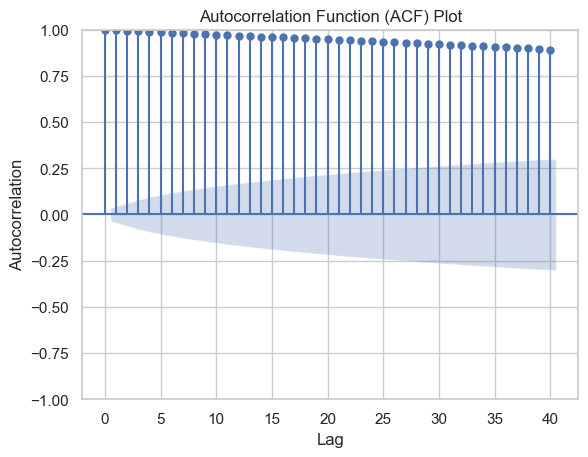

In [9]:
if 'Date' not in df.columns:
    print("'Date' is already the index or not present in the DataFrame.")
else:
    df.set_index('Date', inplace=True)

plt.figure(figsize=(12, 6))
plot_acf(df['High'], lags=40)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()

In [10]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['High'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: 0.7671404880535934
p-value: 0.9910868050318213
Critical Values: {'1%': -3.4325316347197403, '5%': -2.862503905260741, '10%': -2.5672831121111113}


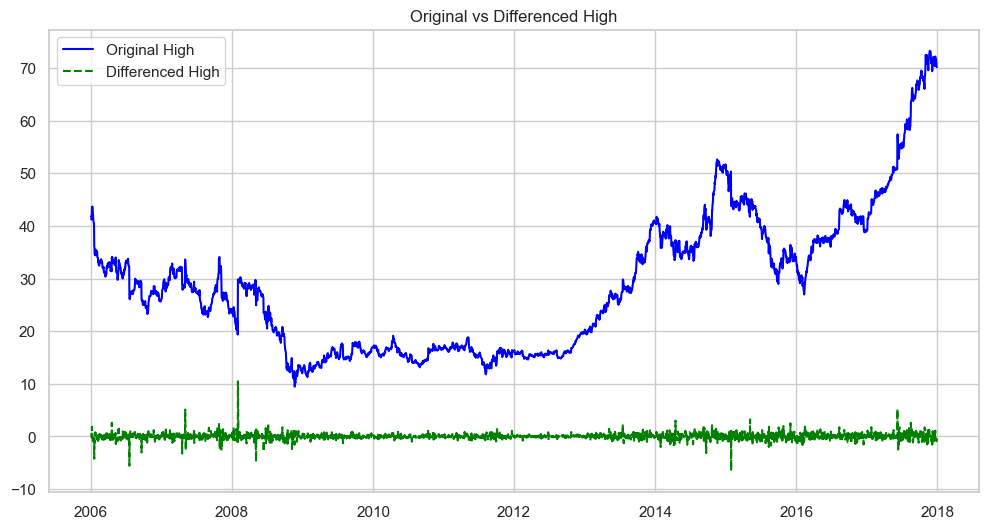

In [11]:
df['high_diff'] = df['High'].diff()

plt.figure(figsize=(12, 6))
plt.plot(df['High'], label='Original High', color='blue')
plt.plot(df['high_diff'], label='Differenced High', linestyle='--', color='green')
plt.legend()
plt.title('Original vs Differenced High')
plt.show()

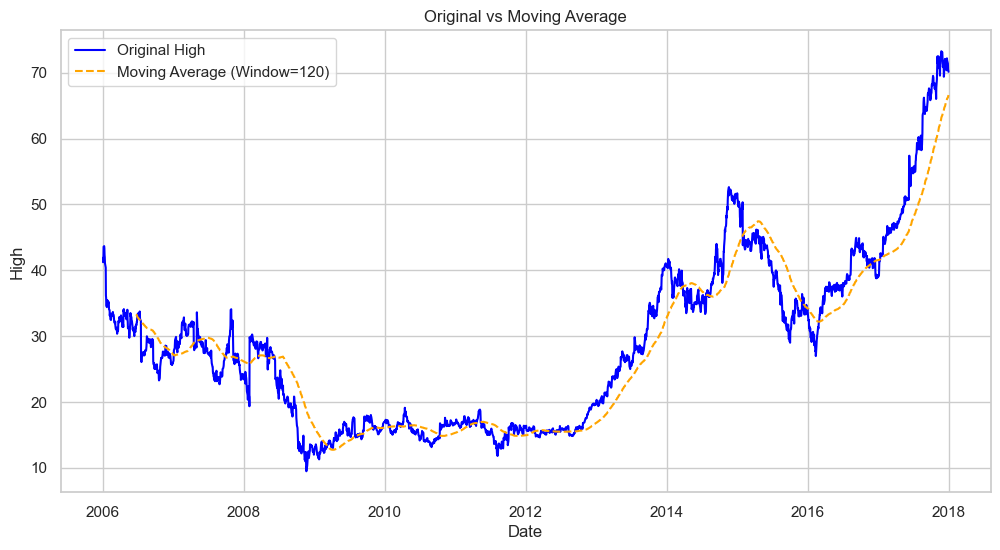

In [12]:
window_size = 120
df['high_smoothed'] = df['High'].rolling(window=window_size).mean()

plt.figure(figsize=(12, 6))

plt.plot(df['High'], label='Original High', color='blue')
plt.plot(df['high_smoothed'], label=f'Moving Average (Window={window_size})', linestyle='--', color='orange')

plt.xlabel('Date')
plt.ylabel('High')
plt.title('Original vs Moving Average')
plt.legend()
plt.show()

In [13]:
df_combined = pd.concat([df['High'], df['high_diff']], axis=1)

print(df_combined.head())

             High  high_diff
Date                        
2006-01-03  41.22        NaN
2006-01-04  41.90       0.68
2006-01-05  41.73      -0.17
2006-01-06  43.57       1.84
2006-01-09  43.66       0.09


In [14]:
df.dropna(subset=['high_diff'], inplace=True)
df['high_diff'].head()

Date
2006-01-04    0.68
2006-01-05   -0.17
2006-01-06    1.84
2006-01-09    0.09
2006-01-10   -0.32
Name: high_diff, dtype: float64

In [15]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['high_diff'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -12.148367478343255
p-value: 1.5912766134148128e-22
Critical Values: {'1%': -3.4325316347197403, '5%': -2.862503905260741, '10%': -2.5672831121111113}
